In [223]:
import numpy as np
import pandas as pd

data = pd.read_csv('/kaggle/input/salary/data_train.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14734 entries, 0 to 14733
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             14734 non-null  int64 
 1   workclass       14734 non-null  object
 2   fnlwgt          14734 non-null  int64 
 3   education       14734 non-null  object
 4   education-num   14734 non-null  int64 
 5   marital-status  14734 non-null  object
 6   occupation      14734 non-null  object
 7   relationship    14734 non-null  object
 8   race            14734 non-null  object
 9   sex             14734 non-null  object
 10  capital-gain    14734 non-null  int64 
 11  capital-loss    14734 non-null  int64 
 12  hours-per-week  14734 non-null  int64 
 13  >50K,<=50K      14734 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.6+ MB


In [225]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
>50K,<=50K        object
dtype: object

In [226]:
data[data == '?'] = np.nan
data.isna().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
>50K,<=50K        False
dtype: bool

<Axes: >

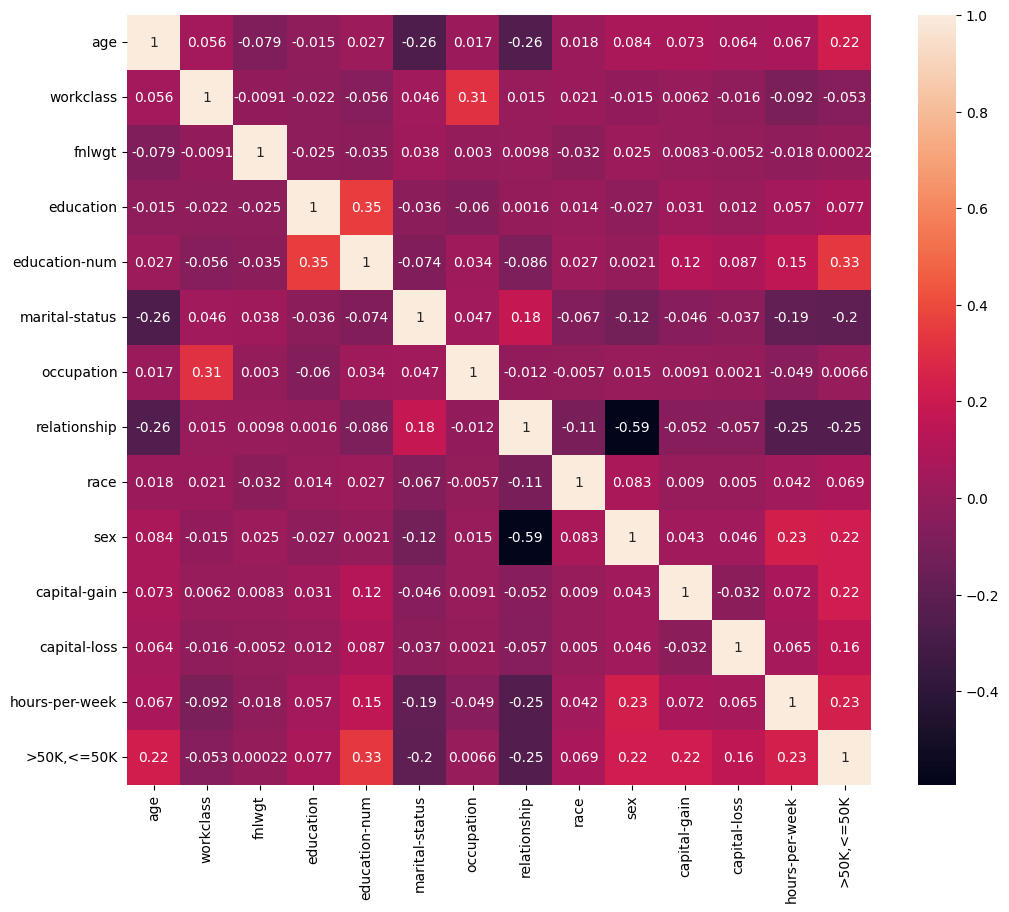

In [227]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

enc_data = data

le = LabelEncoder()
enc_data = enc_data.apply(lambda x: le.fit_transform(x) if x.dtype == object else x)

plt.figure(figsize=(12, 10))
sns.heatmap(enc_data.corr(), annot=True)

In [228]:
y = data['>50K,<=50K']
data = data.drop(columns=['>50K,<=50K'])
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4         >50K
         ...  
14729    <=50K
14730    <=50K
14731    <=50K
14732    <=50K
14733    <=50K
Name: >50K,<=50K, Length: 14734, dtype: object

In [229]:
y[y == '<=50K'] = 0
y[y == '>50K'] = 1
y = y.astype(np.int32, copy=False)
y

0        0
1        0
2        0
3        0
4        1
        ..
14729    0
14730    0
14731    0
14732    0
14733    0
Name: >50K,<=50K, Length: 14734, dtype: int32

In [230]:
real_columns = data.select_dtypes(exclude=object).columns.values
real_data = data[real_columns]
real_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,34,284843,9,594,0,60
1,40,190290,10,0,0,40
2,36,177858,13,0,0,40
3,22,184756,10,0,0,30
4,47,149700,13,15024,0,40
...,...,...,...,...,...,...
14729,18,395567,9,0,0,40
14730,62,94931,11,3411,0,40
14731,34,261023,10,0,1651,38
14732,26,195327,9,0,0,40


In [231]:
cat_columns = data.select_dtypes(include=object).columns.values
cat_data = data[cat_columns]
cat_data

,workclass,education,marital-status,occupation,relationship,race,sex
0,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male
1,Private,Some-college,Divorced,Sales,Not-in-family,White,Male
2,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Own-child,White,Male
3,Private,Some-college,Never-married,Sales,Own-child,White,Female
4,Private,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male
...,...,...,...,...,...,...,...
14729,Private,HS-grad,Never-married,Handlers-cleaners,Own-child,White,Male
14730,NaN,Assoc-voc,Married-civ-spouse,NaN,Husband,White,Male
14731,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male
14732,Private,HS-grad,Never-married,Sales,Own-child,White,Male


In [232]:
from sklearn.model_selection import train_test_split

train_real_data, test_real_data, train_cat_data, test_cat_data, y_train, y_test = train_test_split(real_data, cat_data, y, train_size=0.7)

In [233]:
train_cat_data = train_cat_data.fillna('unknown')
test_cat_data = test_cat_data.fillna('unknown')

In [234]:
from catboost import Pool

train_data_for_boosting = pd.concat([train_real_data, train_cat_data], axis=1)
test_data_for_boostring = pd.concat([test_real_data, test_cat_data], axis=1)

In [235]:
train_data_for_boosting

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex
1845,25,191230,10,0,0,40,Private,Some-college,Never-married,Exec-managerial,Own-child,White,Female
2862,60,138502,13,7298,0,48,Local-gov,Bachelors,Married-civ-spouse,Protective-serv,Husband,White,Male
11547,23,200973,9,0,0,40,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,White,Female
6508,29,206351,6,5013,0,40,Private,10th,Married-civ-spouse,Craft-repair,Husband,White,Male
2350,57,124507,13,0,0,55,Private,Bachelors,Married-civ-spouse,Sales,Husband,White,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4386,58,225394,9,0,1902,40,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male
2091,24,208882,9,0,0,40,Private,HS-grad,Never-married,Craft-repair,Not-in-family,Black,Male
11451,38,227794,13,0,0,40,Private,Bachelors,Never-married,Adm-clerical,Not-in-family,Black,Male
3602,57,414994,10,0,0,40,Federal-gov,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male


In [236]:
test_data_for_boostring

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex
7130,39,108069,10,0,0,40,Private,Some-college,Never-married,Craft-repair,Unmarried,White,Female
6034,19,43285,10,0,0,20,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Female
8129,57,124852,10,0,0,40,Private,Some-college,Never-married,Handlers-cleaners,Own-child,Black,Male
3055,37,186934,10,0,0,40,State-gov,Some-college,Married-civ-spouse,Other-service,Husband,White,Male
859,41,167725,10,0,0,40,Private,Some-college,Divorced,Machine-op-inspct,Not-in-family,White,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,24,228686,10,0,0,45,Private,Some-college,Never-married,Other-service,Not-in-family,White,Male
3559,29,243660,9,0,0,50,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male
3655,37,239397,6,0,0,40,Private,10th,Married-civ-spouse,Machine-op-inspct,Husband,White,Male
12912,46,59287,10,0,0,40,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male


In [237]:
cat_features = np.arange(train_cat_data.shape[1]) + train_real_data.shape[1]

train_dataset = Pool(data=train_data_for_boosting,
                     label=y_train,
                     cat_features=cat_features)

test_dataset = Pool(data=test_data_for_boostring,
                    cat_features=cat_features)

In [238]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=0)

grid = {
    'depth': np.arange(6, 10)
}

grid_search_result = model.grid_search(grid, X=train_dataset, plot=True, cv=2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.3018230747
bestIteration = 592

0:	loss: 0.3018231	best: 0.3018231 (0)	total: 19s	remaining: 57s

bestTest = 0.3026120998
bestIteration = 692

1:	loss: 0.3026121	best: 0.3018231 (0)	total: 40.7s	remaining: 40.7s

bestTest = 0.3040988652
bestIteration = 631

2:	loss: 0.3040989	best: 0.3018231 (0)	total: 1m 5s	remaining: 21.9s

bestTest = 0.3029195222
bestIteration = 544

3:	loss: 0.3029195	best: 0.3018231 (0)	total: 1m 41s	remaining: 0us
Estimating final quality...
Training on fold [0/2]

bestTest = 0.287316569
bestIteration = 767

Training on fold [1/2]

bestTest = 0.298083256
bestIteration = 859



In [239]:
grid_search_result['params']

{'depth': 6}

In [240]:
pred_proba_train = model.predict_proba(X=train_dataset)[:, 1]
pred_proba_test = model.predict_proba(X=test_dataset)[:, 1]

In [241]:
pred_proba_test, pred_proba_train

(array([1.66550200e-02, 2.66176211e-04, 8.77082634e-03, ...,
        7.64531004e-02, 3.34056926e-01, 3.28938623e-03]),
 array([7.14588457e-03, 9.94289815e-01, 1.82413019e-03, ...,
        6.45143432e-02, 6.95375539e-01, 4.85102797e-04]))

In [242]:
from sklearn.metrics import roc_auc_score

roc_auc_train = roc_auc_score(y_train, pred_proba_train)
roc_auc_test = roc_auc_score(y_test, pred_proba_test)

roc_auc_train, roc_auc_test

(0.9504812701951891, 0.9246657633243)

In [243]:
from sklearn.metrics import accuracy_score

pred_train = model.predict(train_dataset)
pred_test = model.predict(test_dataset)

accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.8933385047997673, 0.8703913141823117)

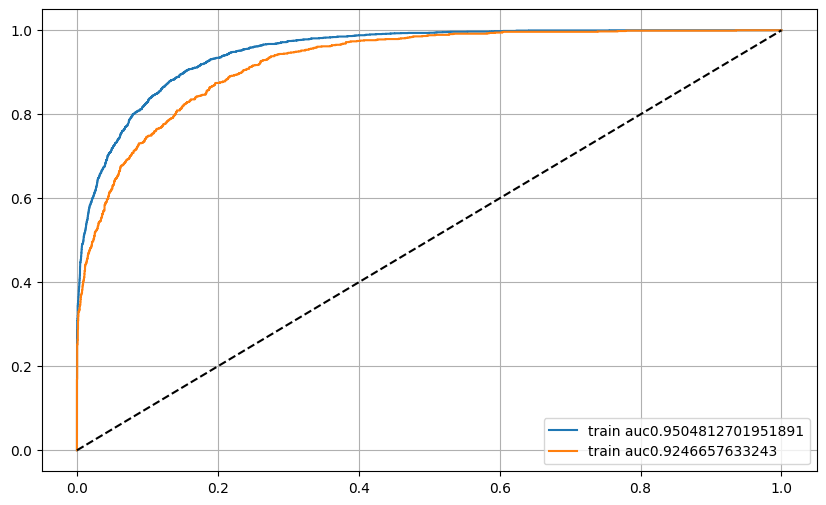

In [244]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 6))

plt.plot(*roc_curve(y_train, pred_proba_train)[:2], label=f'train auc{roc_auc_train}')
plt.plot(*roc_curve(y_test, pred_proba_test)[:2], label=f'train auc{roc_auc_test}')
plt.plot([0, 1], [0, 1], '--', color='black')

plt.grid()
plt.legend()
plt.show()